In [1]:
import sys
sys.path.insert(0, '../')
from gw_tools.gw_plot import gw_plot
from gw_tools import data_prep
from gw_tools.gw_cnn import gw_cnn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [2]:
wells = ['AEK201', 'AFL259', 'APK309', 'APK310']
def standard_prep(well):
    ## Load cleaned data
    df = data_prep.load_data(well)
    ## Select features for training
    df = data_prep.select_features(df)
    ## Add time of year signal information
    df = data_prep.add_toy_signal(df)
    ## Set aside holdout data for final model validation
    return data_prep.prep_data_for_training(df)

# Linear Regression

Before developing our own models, we used Scikit-Learn's built in `LinearRegression`.

On the holdout set for AEK201, the predictions made using LinearRegression exhibited a root mean squared of 0.8545020990111025


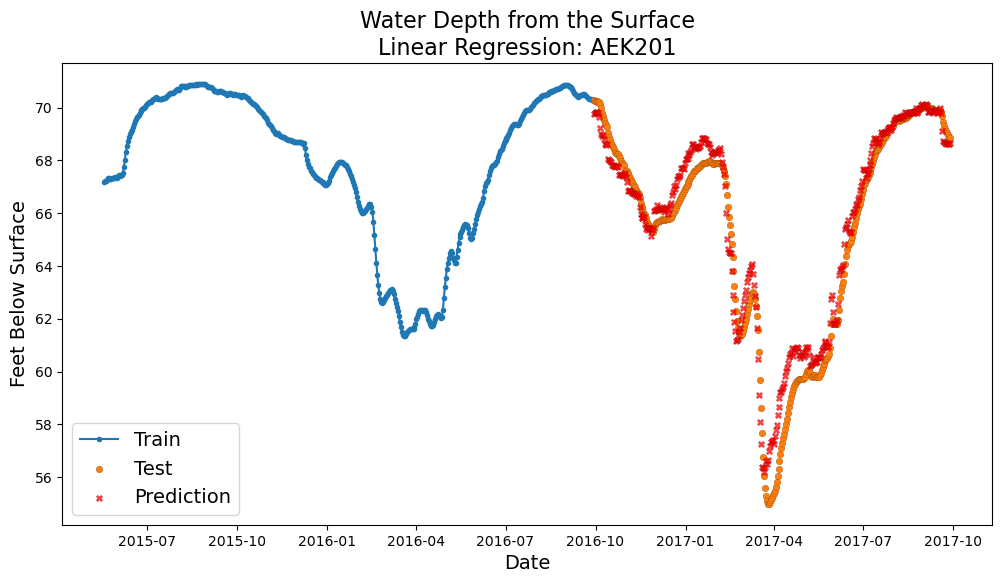

On the holdout set for AFL259, the predictions made using LinearRegression exhibited a root mean squared of 4.81108772253775


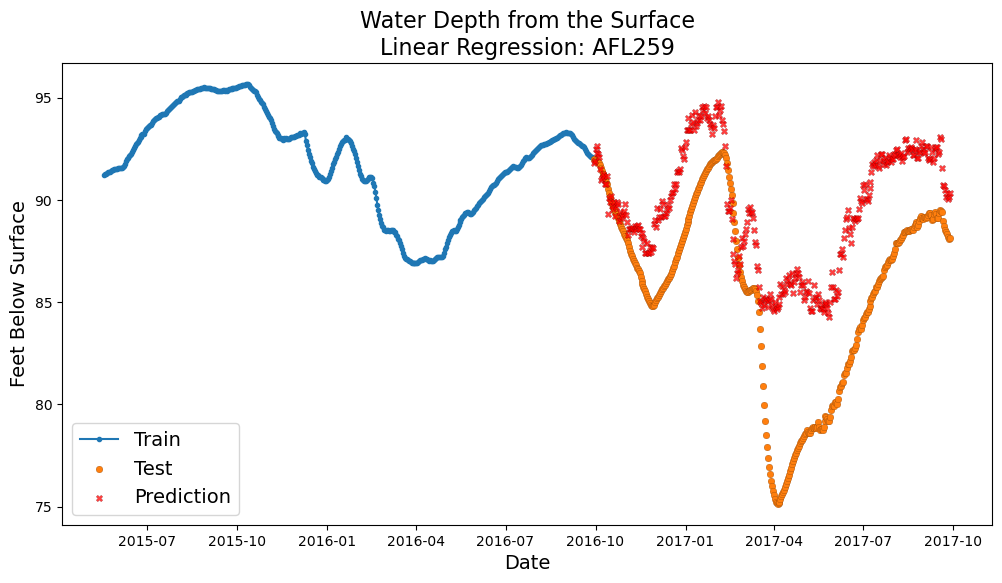

On the holdout set for APK309, the predictions made using LinearRegression exhibited a root mean squared of 1.7315118027857022


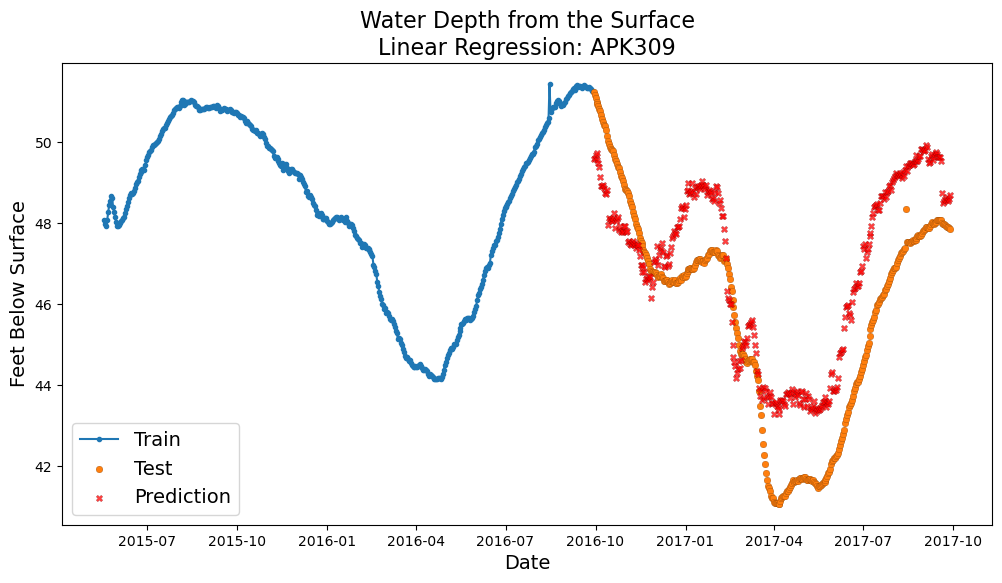

On the holdout set for APK310, the predictions made using LinearRegression exhibited a root mean squared of 2.3241174423411923


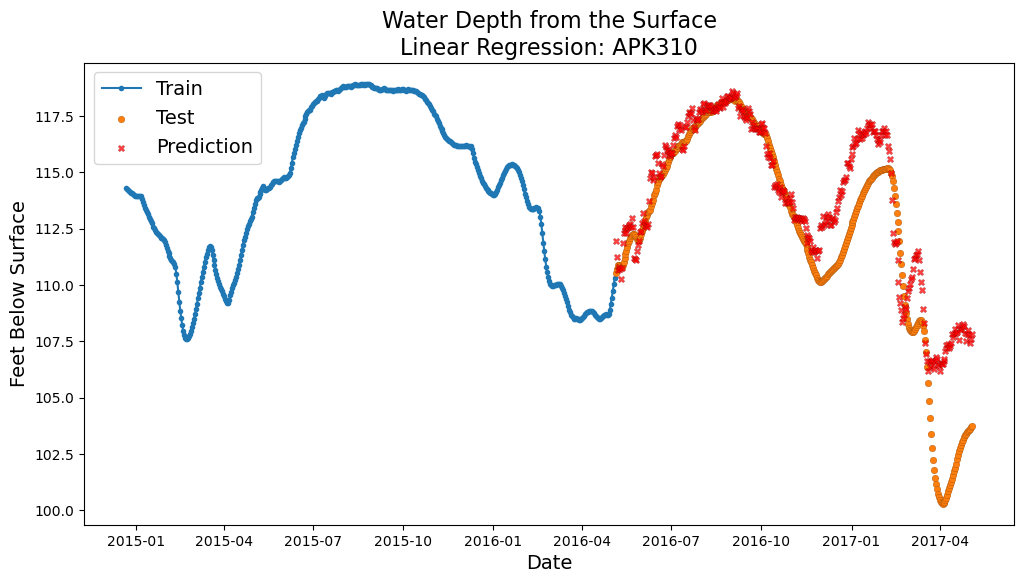

In [3]:
for well in wells:
    ## Prepare the training and holdout data
    X_train, X_holdout, y_train, y_holdout, dt_train, dt_holdout = standard_prep(well)
    ## Instantiate the model
    model_linreg  = LinearRegression(copy_X=True)
    ## Fit the model
    model_linreg.fit(X_train, y_train)
    ## Make predictions
    pred = model_linreg.predict(X_holdout)
    ## Compute RMSE
    mse = np.mean((pred-y_holdout)**2)
    rmse = np.sqrt(mse)
    ## Print results
    print(f'On the holdout set for {well}, the predictions made using LinearRegression exhibited a root mean squared of {rmse}')
    ## Plot results
    dates = np.append(dt_train, dt_holdout)
    gw_plot(train = y_train, test = y_holdout, pred = pred, dates = dates, train_limit=500, model='Linear Regression: '+well)